In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.compose import ColumnTransformer
import pickle

import warnings 
warnings.filterwarnings("ignore")

df=pd.read_csv("kaggle_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [2]:
df_copy=df.copy(deep=True)
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


1     356
0     301
2     284
3     195
4     191
5     141
6     131
7     100
8      96
9      70
10     54
11     24
12     23
13     22
14      7
17      3
15      2
Name: Pregnancies, dtype: int64

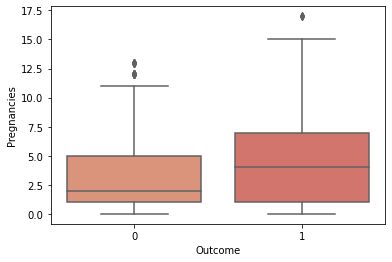

In [3]:
#Analysing Pregnancies feature
sns.boxplot("Outcome","Pregnancies",data=df,palette=sns.color_palette("flare"))
df['Pregnancies'].value_counts()

In [4]:
#doing operation in Pregnancies column

replace={11:1,12:1,13:1,14:1,15:1,17:1}
df_copy=df_copy.replace({"Pregnancies":replace})
(df_copy["Pregnancies"]==13).sum()

0

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

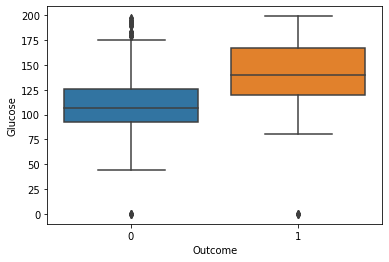

In [5]:
#Glucose
sns.boxplot("Outcome","Glucose",data=df)

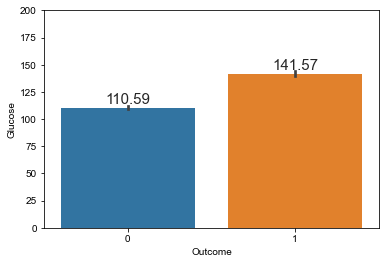

In [6]:
bar_plot_Glucose=sns.barplot("Outcome","Glucose",data=df)
sns.set_style("white")

plt.ylim([0,200])

for bar in bar_plot_Glucose.patches:
      bar_plot_Glucose.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),textcoords='offset points')

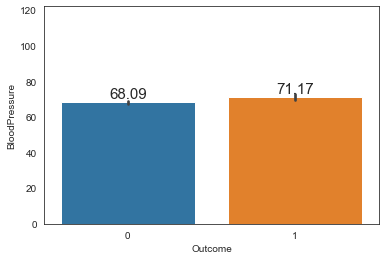

In [7]:
bar_plot_BloodPressure=sns.barplot("Outcome","BloodPressure",data=df)
sns.set_style("white")

plt.ylim([0,(df["BloodPressure"].max())])


for bar in bar_plot_BloodPressure.patches:
      bar_plot_BloodPressure.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),textcoords='offset points')

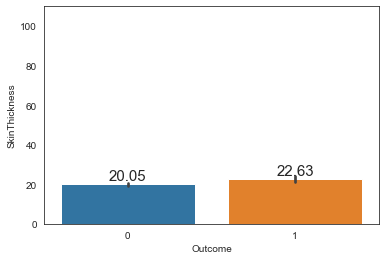

In [8]:
bar_plot_SkinThickness=sns.barplot("Outcome","SkinThickness",data=df)
sns.set_style("white")

plt.ylim([0,(df["SkinThickness"].max())])

for bar in bar_plot_SkinThickness.patches:
      bar_plot_SkinThickness.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),textcoords='offset points')

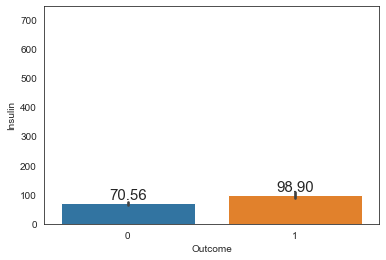

In [9]:
bar_plot_Insulin=sns.barplot("Outcome","Insulin",data=df)
sns.set_style("white")

plt.ylim([0,(df["Insulin"].max())])

for bar in bar_plot_Insulin.patches:
      bar_plot_Insulin.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),textcoords='offset points')

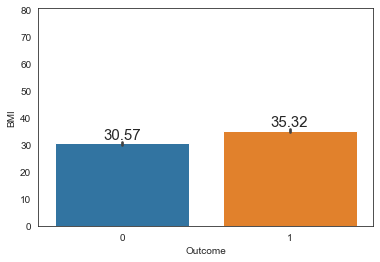

In [10]:
bar_plot_BMI=sns.barplot("Outcome","BMI",data=df)
sns.set_style("white")
plt.ylim([0,(df["BMI"].max())])

for bar in bar_plot_BMI.patches:
      bar_plot_BMI.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),textcoords='offset points')

In [11]:
df_replace_0=df_copy[["Glucose", "BloodPressure", "SkinThickness", "Insulin",
       "BMI",'Outcome']].groupby('Outcome',as_index=False).mean()

df_copy["Glucose"].replace(0,df_replace_0["Glucose"].mean(),inplace=True)
df_copy["BloodPressure"].replace(0,df_replace_0["BloodPressure"].mean(),inplace=True)
df_copy["SkinThickness"].replace(0,df_replace_0["SkinThickness"].mean(),inplace=True)
df_copy["Insulin"].replace(0,df_replace_0["Insulin"].mean(),inplace=True)
df_copy["BMI"].replace(0,df_replace_0["BMI"].mean(),inplace=True)

In [12]:
#Age
df_copy["Age"]=df_copy["Age"].astype(int)
df_copy["Categ_age"]=pd.cut(df_copy["Age"],4)
df_copy[["Categ_age","Outcome"]].groupby("Categ_age",as_index=False).mean()

df_copy.loc[df_copy["Age"] <=33,"Age"]=0
df_copy.loc[(df_copy["Age"] >33) & (df_copy["Age"] <=45) ,"Age"]=1
df_copy.loc[(df_copy["Age"] >45) & (df_copy["Age"] <=57),"Age" ]=2
df_copy.loc[(df_copy["Age"] >57) & (df_copy["Age"] <=69) ,"Age"]=3
df_copy.loc[(df_copy["Age"] >69),"Age"]=4

In [13]:
#StandardScaling the selected features

ct=ColumnTransformer([("Std_1",StandardScaler(),['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction'])],remainder='passthrough')
ct.fit_transform(df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']])

array([[ 0.52405605, -0.85941257,  0.81025509, -0.41199854,  0.13157053,
        -1.06324616],
       [-1.24485478,  0.81277734,  0.40259527,  0.048545  ,  0.77148853,
        -0.7355513 ],
       [ 0.75335931, -0.22140308, -0.58162434, -0.41199854,  1.60616418,
         0.49175869],
       ...,
       [-1.21209717,  0.47833936, -0.58162434, -0.41199854, -0.20229973,
        -0.27492362],
       [ 0.22923758,  3.15384322,  1.93131959,  0.10572802,  4.79184291,
        -0.46968566],
       [-1.3431276 , -0.02331761, -1.22804402, -0.51184862, -0.3553236 ,
         0.23516743]])

In [14]:
#Modelling and predicting
classifier_models = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    
    GaussianNB(),
    
    LogisticRegression()]



X=df_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df_copy['Outcome']

acc_dict={}
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
skf=StratifiedKFold(n_splits=5)

for train_index,test_index in skf.split(X,y):
    train_X,test_X=X.iloc[train_index,:],X.iloc[test_index,:]
    train_y,test_y=y[train_index],y[test_index]
    for clf in classifier_models:
        name = clf.__class__.__name__
        clf.fit(train_X,train_y)
        test_predictions = clf.predict(test_X)
        acc = accuracy_score(test_y, test_predictions)
        if name in acc_dict:
            acc_dict[name]=acc_dict[name]+acc
        else:
            acc_dict[name]=acc
        

for clf in acc_dict:
        acc_dict[clf]=acc_dict[clf]/5
        log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
        log = log.append(log_entry)

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

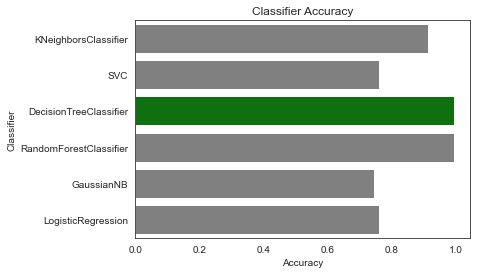

In [15]:
#visualizing the results
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

colors = ['grey' if (s < max(log["Accuracy"])) else 'green' for s in log["Accuracy"]]
sns.barplot(x='Accuracy', y='Classifier', data=log,palette=colors)

In [16]:
#Building our DecisionTreeClassifier
for train_index,test_index in skf.split(X,y):
    train_X,test_X=X.iloc[train_index,:],X.iloc[test_index,:]
    train_y,test_y=y[train_index],y[test_index]
    model_final=DecisionTreeClassifier().fit(train_X,train_y)
    pred_y=model_final.predict(test_X)
    
    cm=confusion_matrix(test_y,pred_y)
    print(cm)
    
    clf_report=classification_report(test_y,pred_y)
    print(clf_report)

[[263   0]
 [  0 137]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       137

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

[[260   3]
 [  0 137]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       263
           1       0.98      1.00      0.99       137

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

[[263   0]
 [  0 137]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       137

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weigh

<AxesSubplot:>

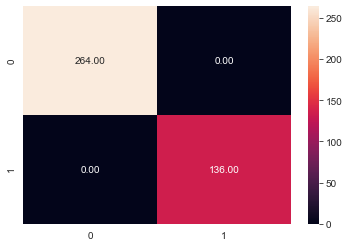

In [17]:
#confusion matrix heatmap
cm=confusion_matrix(test_y,pred_y)
sns.heatmap(cm,annot=True,fmt='.2f')

In [18]:
#classification report
clf_report=classification_report(test_y,pred_y)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       136

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [19]:
model_final=DecisionTreeClassifier().fit(train_X,train_y)
pred_y=model_final.predict(test_X)
actual_pred_y=pd.DataFrame()
actual_pred_y["actual_y"]=test_y
actual_pred_y["pred_y"]=pred_y
actual_pred_y

,actual_y,pred_y
1598,0,0
1599,0,0
1600,0,0
1601,0,0
1603,0,0
...,...,...
1995,0,0
1996,1,1
1997,0,0
1998,1,1


In [20]:
with open('DCM.pkl','wb') as ModelFile:
    pickle.dump(model_final,ModelFile)